<a href="https://colab.research.google.com/github/kanjamwingirwa/Olist/blob/kanja/Olist_Analysis_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt
import warnings
warnings. filterwarnings("ignore")

Read, Review and Clean each dataset at a time. 

Customer Dataset

In [2]:
#Let us begin by loading the datasets
customer_df = pd.read_csv('/content/olist_customers_dataset.csv')
customer_df.head(5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


There seems to be no null values in the customer dataset. 

In [4]:
#We then have to change the postal code to string as it doesn't have a numerical bearing
customer_df['customer_zip_code_prefix']=customer_df['customer_zip_code_prefix'].astype(str)
customer_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
#lets capitalize the first letter of the cities
customer_df['customer_city'] = customer_df.customer_city.str.title() 

In [6]:
customer_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao Bernardo Do Campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao Paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Mogi Das Cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP


In [7]:
#lets look at the data types
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


Items DataSet

In [8]:
order_items_df = pd.read_csv('//content/olist_order_items_dataset.csv')
order_items_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
#lets check for null values and check for null values
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


No null values in the order_items_df

In [10]:
#lets change the shipping_limit_date to from object date_time
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'], dayfirst=True)
order_items_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Orders Dataset

In [12]:
#Let us begin by loading the datasets
orders_df = pd.read_csv('/content/olist_orders_dataset.csv')
orders_df.head(5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [13]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [14]:
#lets change the order_purchase_timestamo to datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'], dayfirst=True)
orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [15]:
#we delete these specific columns because we assume that they are NaN because the customer cancelled the order. As seen they are all equal/ 
orders_df = orders_df.drop(['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'], axis=1)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39


In [16]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_status              99441 non-null  object        
 3   order_purchase_timestamp  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ MB


Reviews Table

In [17]:
reviews_df = pd.read_csv('/content/olist_order_reviews_dataset.csv')
reviews_df.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [18]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [19]:
#lets delete the two columns with numerous null values
reviews_df = reviews_df.drop(['review_comment_title', 'review_comment_message'], axis=1)

In [20]:
#lets check to see if it has been implemented
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Sellers Table

In [21]:
sellers_df = pd.read_csv('/content/olist_sellers_dataset.csv')
sellers_df.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [22]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [23]:
#lets capitalize the first letter of the cities
sellers_df['seller_city'] = sellers_df.seller_city.str.title() 

In [24]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Sao Paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista,SP


In [25]:
#We then have to change the postal code to string as it doesn't have a numerical bearing
sellers_df['seller_zip_code_prefix']=sellers_df['seller_zip_code_prefix'].astype(str)
sellers_df.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Sao Paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista,SP


In [26]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   object
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


Payments Table

In [27]:
payments_df = pd.read_csv('/content/olist_order_payments_dataset.csv')
payments_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [28]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


No cleaning needed here. 

GeoLocation DataSet

In [29]:
geolocation_df = pd.read_csv('/content/olist_geolocation_dataset.csv')
geolocation_df.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [30]:
#We then have to change the postal code to string as it doesn't have a numerical bearing
geolocation_df['geolocation_zip_code_prefix']=geolocation_df['geolocation_zip_code_prefix'].astype(str)
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  object 
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), object(3)
memory usage: 38.2+ MB


In [31]:
#lets capitalize the first letter of the cities
geolocation_df['geolocation_city'] = geolocation_df.geolocation_city.str.title() 
geolocation_df.tail()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1000158,99950,-28.068639,-52.010705,Tapejara,RS
1000159,99900,-27.877125,-52.224882,Getulio Vargas,RS
1000160,99950,-28.071855,-52.014716,Tapejara,RS
1000161,99980,-28.388932,-51.846871,David Canabarro,RS
1000162,99950,-28.070104,-52.018658,Tapejara,RS


Products Table

In [32]:
product_df = pd.read_csv('/content/olist_products_dataset.csv')
product_df.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [33]:
#lets correct the spellings in the products table
dict = {'product_name_lenght': 'product_name_length',
        'product_description_lenght': 'product_description_length'}

In [34]:
#products_df
product_df.rename(columns=dict,
          inplace=True) 

In [35]:
product_df.head(5)

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [36]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [37]:
#if product_category_name is missing we fill it with not categorized
product_df['product_category_name'] = product_df['product_category_name'].fillna('Not Categorized')

In [38]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [39]:
#relace the rest of the df with 0
product_df = product_df.fillna(0)

In [40]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_length         32951 non-null  float64
 3   product_description_length  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [41]:
product_translation_df = pd.read_excel('/content/product_category_name_translation.xlsx')
product_translation_df.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [42]:
product_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


No null values here 

In [43]:

datasets = [customer_df, geolocation_df, order_items_df, payments_df, reviews_df, orders_df, product_df, sellers_df, product_translation_df]
titles = ["customers", "geolocation", "items", "payments", "reviews", "orders", "products", "sellers", "category_translation"]

data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col in data.columns ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [data.duplicated().sum() for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='YlGnBu')
     

,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163,5,261831,0,
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
4,reviews,"review_id, order_id, review_score, review_creation_date, review_answer_timestamp",100000,5,0,0,
5,orders,"order_id, customer_id, order_status, order_purchase_timestamp",99441,4,0,0,
6,products,"product_id, product_category_name, product_name_length, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951,9,0,0,
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
8,category_translation,"product_category_name, product_category_name_english",71,2,0,0,


There are no null values in the dataset. We also have some duplicate values but this is to be expected since many people can buy the same product.

Research Questions

What is the total revenue generated by Olist, and how has it changed over time?

In [47]:
#to see how revenues change over time we need to merge payments_df with orders_df
combined_df = pd.merge(payments_df,orders_df,on='order_id')
combined_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17


In [48]:
#to get total revenue we shall use the payments df
total_payments = payments_df['payment_value'].sum()
print(total_payments)

16008872.12


In [49]:
delivered_payments = combined_df[combined_df['order_status']== 'delivered']['payment_value'].sum()

In [50]:
print(delivered_payments)

15422461.77


The total revenue shoulld be 16008872.12 but with cancelled orders it now stands at $15422461.77

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17


In [54]:
# Filter all rows for which the order was delivered
combined2_df = combined_df[combined_df['order_status'] == 'delivered']
 
# Print the new dataframe
combined2_df.head(5)
 


,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,Date,Year,Month,DayOfWeek
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:01:49,2018,4,Wednesday
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:01:38,2018,6,Tuesday
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-12 11:19:55,2017,12,Tuesday
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:04:06,2017,12,Wednesday
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 13:59:17,2018,5,Monday


In [55]:
# Rename date column and separate into year, month, day etc
combined2_df['Date'] = pd.to_datetime(combined_df['order_purchase_timestamp'])
combined2_df['Year'] = combined_df['Date'].dt.year
combined2_df['Month'] = combined_df['Date'].dt.month
combined2_df['DayOfWeek']  = combined_df['Date'].dt.day_name()

In [56]:
combined2_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,Date,Year,Month,DayOfWeek
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:01:49,2018,4,Wednesday
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:01:38,2018,6,Tuesday
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-12 11:19:55,2017,12,Tuesday
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:04:06,2017,12,Wednesday
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 13:59:17,2018,5,Monday


In [59]:
#lets remove the original order_purchase_timestamp for a cleaner df
#combined2_df = combined2_df.drop(['order_purchase_timestamp'], axis=1)
combined2_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,Date,Year,Month,DayOfWeek
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018,4,Wednesday
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018,6,Tuesday
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017,12,Tuesday
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017,12,Wednesday
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018,5,Monday


In [60]:
combined2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100756 entries, 0 to 103885
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_id              100756 non-null  object        
 1   payment_sequential    100756 non-null  int64         
 2   payment_type          100756 non-null  object        
 3   payment_installments  100756 non-null  int64         
 4   payment_value         100756 non-null  float64       
 5   customer_id           100756 non-null  object        
 6   order_status          100756 non-null  object        
 7   Date                  100756 non-null  datetime64[ns]
 8   Year                  100756 non-null  int64         
 9   Month                 100756 non-null  int64         
 10  DayOfWeek             100756 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 9.2+ MB


In [61]:
changes = pd.DataFrame(combined2_df.groupby([combined2_df.Date.dt.year])['payment_value'].sum())
changes
     

,payment_value
Date,
2016,46586.33
2017,6922900.24
2018,8452975.20


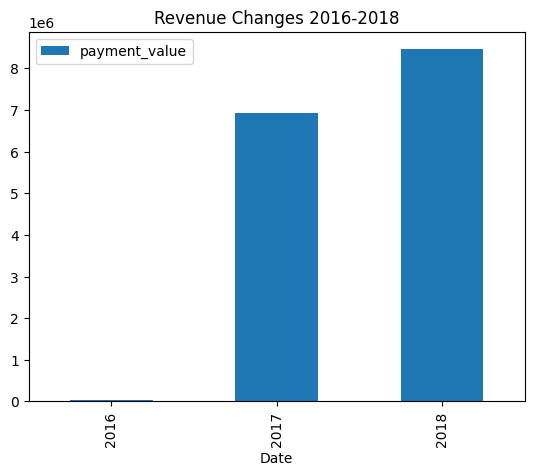

In [62]:
changes.sort_values('Date').plot(kind='bar', title = 'Revenue Changes 2016-2018');

2016 had the least sales but this increased as time went on

In [63]:
from calendar import month_name

In [64]:
months = ['January', 'February', 'March', 'April',
          'May', 'June', 'July', 'August',
          'September', 'October', 'November', 'December']

<Axes: xlabel='Date'>

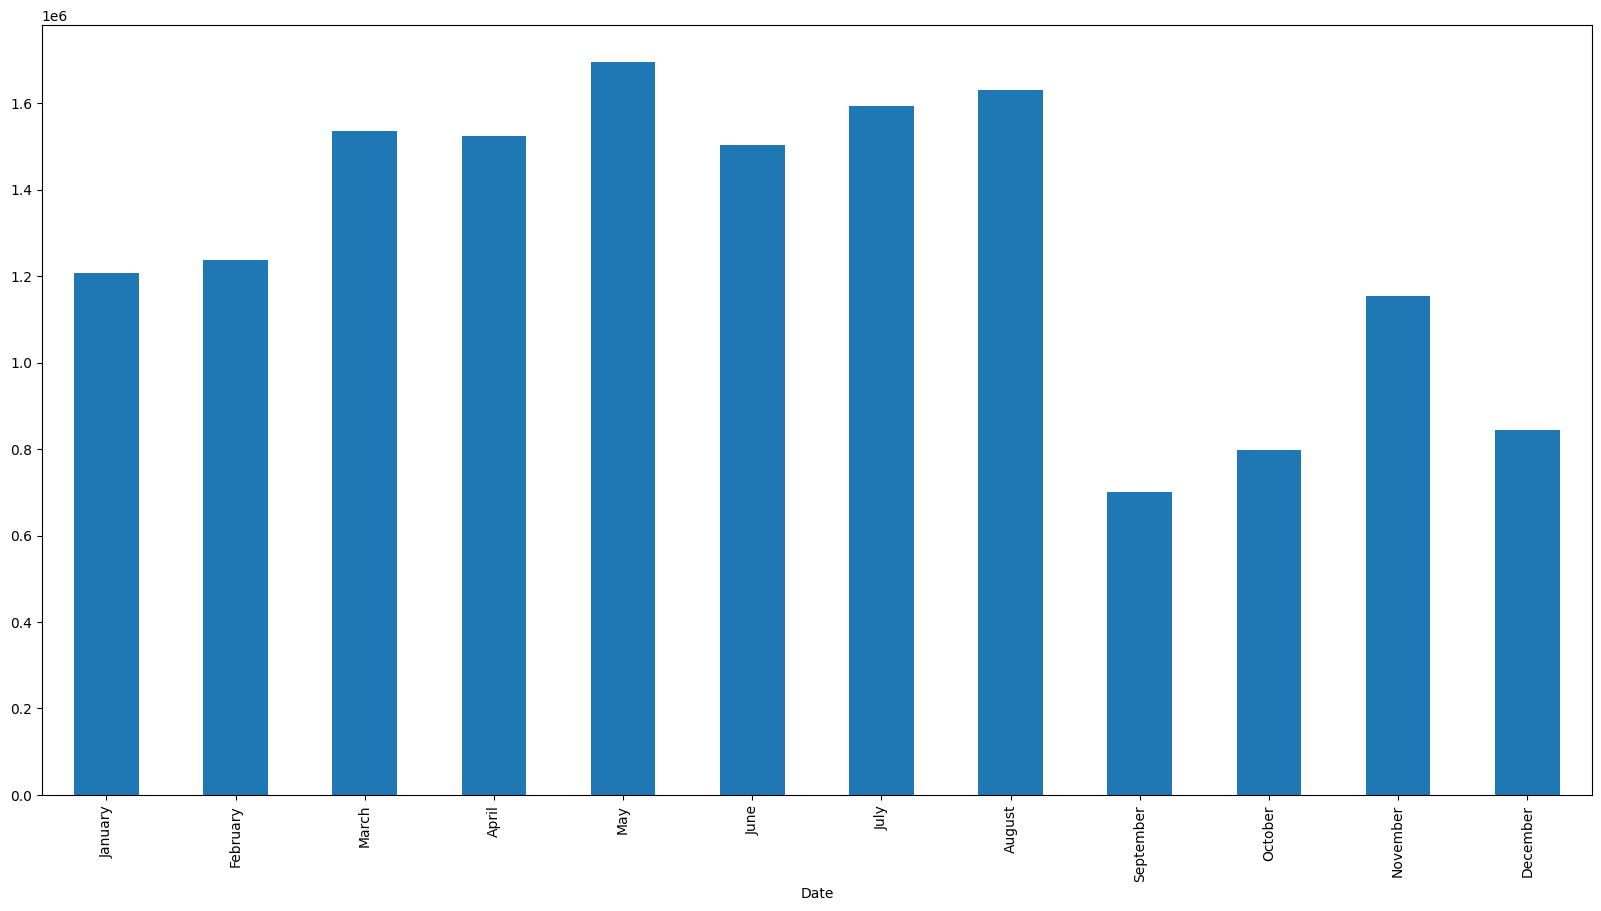

In [66]:
combined2_df.groupby(combined_df['Date'].dt.strftime('%B'))['payment_value'].sum().reindex(months).plot.bar(figsize=(20,10))

Cumulatively, May was the month that most sales were made. 

In [67]:
Months_of_the_Year = combined2_df[['Month','Year','payment_value']]
Months_of_the_Year = pd.DataFrame(Months_of_the_Year.groupby(['Year','Month'])['payment_value'].sum()).sort_index()
Months_of_the_Year.sort_values(by=['Year','Month','payment_value']).sort_index()
#Months_of_the_Year.sort_index(key=lambda x: pd.to_datetime(x, format="%B"))

payment_value
Year Month               
2016 10          46566.71
     12             19.62
2017 1          127545.67
     2          271298.65
     3          414369.39
     4          390952.18
     5          567066.73
     6          490225.60
     7          566403.93
     8          646000.61
     9          701169.99
     10         751140.27
     11        1153528.05
     12         843199.17
2018 1         1078606.86
     2          966510.88
     3         1120678.00
     4         1132933.95
     5         1128836.69
     6         1012090.68
     7         1027903.86
     8          985414.28

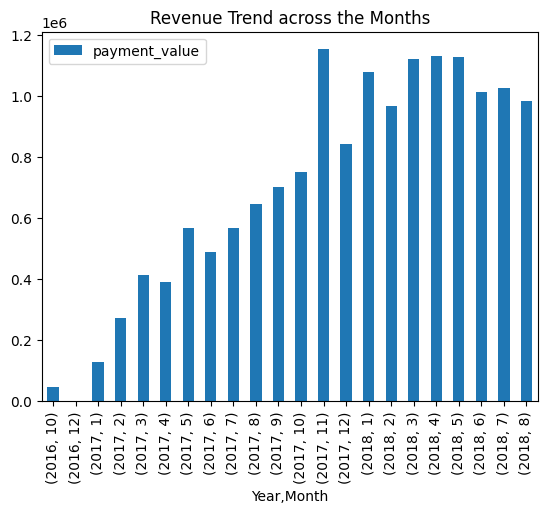

In [68]:
#combined_df.sort_values(by=['Date','payment_value'], ascending=True).plot(kind='bar')
#onths_of_the_Year.sort_values(by=['Year','payment_value'], ascending=True)
Months_of_the_Year.plot(kind='bar', title = 'Revenue Trend across the Months');

November 2017 is the month when most sales were made. 

How many orders were placed on Olist, and how does this vary by month or season? To answer this question, we only focus on the orders dataset.

In [69]:
#let's preview the dataset now
orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39


In [70]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_status              99441 non-null  object        
 3   order_purchase_timestamp  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ MB


In [71]:
orders_df['order_id'].nunique()

99441

99,441 oders were placed on Olist

In [72]:
# Rename date column and separate into year, month, day etc
orders_df['Date'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['Year'] = orders_df['Date'].dt.year
orders_df['Month'] = combined_df['Date'].dt.month
orders_df['DayOfWeek']  = combined_df['Date'].dt.day_name()

In [73]:
orders_per_year = pd.DataFrame(orders_df.groupby([orders_df.Date.dt.year])['order_id'].count())
orders_per_year

,order_id
Date,
2016,329
2017,45101
2018,54011


<Axes: title={'center': 'Orders Made Over the Years(2016-18)'}, xlabel='Date'>

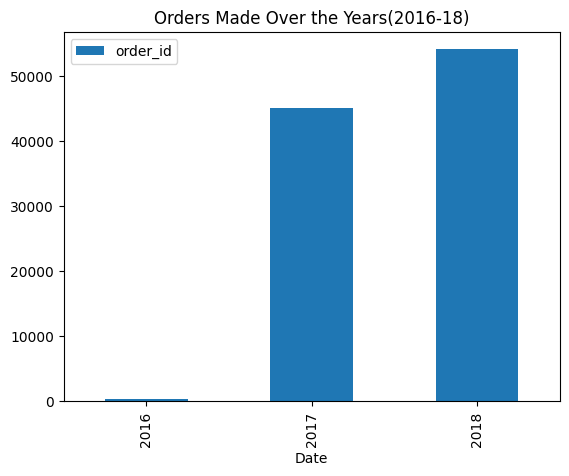

In [75]:
orders_per_year.plot(kind='bar', title='Orders Made Over the Years(2016-18)')

In [76]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,Date,Year,Month,DayOfWeek
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 10:56:33,2017,4.0,Wednesday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-24 20:41:37,2018,6.0,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:38:49,2018,12.0,Tuesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:28:06,2017,12.0,Wednesday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 21:18:39,2018,5.0,Monday


<Axes: title={'center': 'Monthly Orders Placed Cumulatively'}, xlabel='Month', ylabel='Number of Entries'>

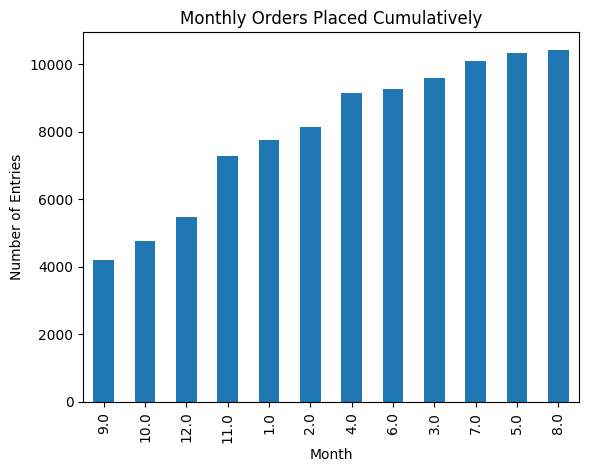

In [77]:
orders_df['Month'].value_counts().sort_values().plot(kind='bar', xlabel='Month', ylabel='Number of Entries', title='Monthly Orders Placed Cumulatively')

Cumulatively, August is the month when most orders were made.

In [78]:
Months_of_the_Year = orders_df[['Month','Year','order_id']]
Months_of_the_Year = pd.DataFrame(Months_of_the_Year.groupby(['Year','Month'])['order_id'].count())
Months_of_the_Year.sort_values(by=['Year','Month','order_id'])

order_id
Year Month          
2016 1.0          27
     2.0          23
     3.0          33
     4.0          35
     5.0          39
     6.0          30
     7.0          28
     8.0          41
     9.0          14
     10.0         14
     11.0         20
     12.0         21
2017 1.0        3576
     2.0        3672
     3.0        4363
     4.0        4128
     5.0        4746
     6.0        4148
     7.0        4620
     8.0        4698
     9.0        1844
     10.0       2212
     11.0       3266
     12.0       2444
2018 1.0        4152
     2.0        4449
     3.0        5205
     4.0        4989
     5.0        5528
     6.0        5085
     7.0        5440
     8.0        5682
     9.0        2335
     10.0       2539
     11.0       3981
     12.0       3022

<Axes: xlabel='Year,Month'>

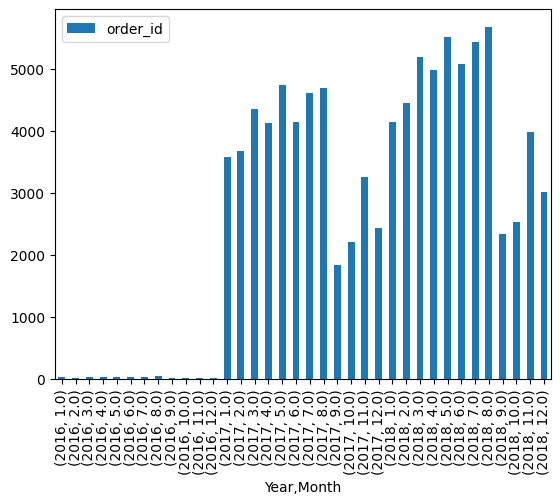

In [79]:
Months_of_the_Year.plot(kind='bar')

It is interesting to note that the orders were made from January 2016 but sales actually began in October since it seems all the orders were cancelled. The most orders were done in 2018 August

In [80]:
#to check if Jan 2016 had orders made
df2 = orders_df[(orders_df['Year'] == 2016) & (orders_df['Month'] == 1.0)]
df2.head(3) 

,order_id,customer_id,order_status,order_purchase_timestamp,Date,Year,Month,DayOfWeek
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-09-05 00:15:34,2016,1.0,Thursday
6820,c78634fb21ecbb54b2b2498a660082ac,7c72a0cfc64d38509b262a4e85c84d9a,delivered,2016-10-07 16:56:35,2016-10-07 16:56:35,2016,1.0,Sunday
7474,323dad8c483c7f8b818a825d257f4aa0,021833e9737a1145b5a6e3053f0f4329,delivered,2016-10-06 20:05:04,2016-10-06 20:05:04,2016,1.0,Saturday


This is to confirm that indeed orders were placed in January, 2016

<Axes: title={'center': 'Orders by Day'}, xlabel='Month', ylabel='Number of Entries'>

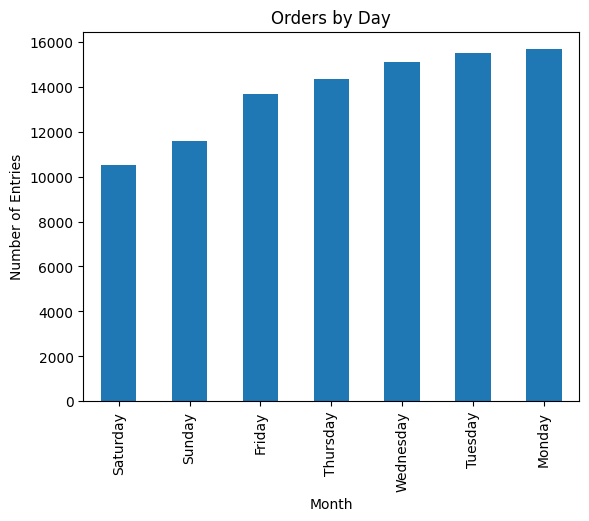

In [81]:
orders_df['DayOfWeek'].value_counts().sort_values().plot(kind='bar', xlabel='Month', ylabel='Number of Entries', title='Orders by Day')

Shockingly, most orders were made on Monday. Momentum to make orders decreased as the week went on. What could be the reason for this?

What are the most popular product categories on Olist, and how do their sales volumes compare to each other?

To achieve this we will merge the order_items_df with products_df in order to cateogirze various orders in their categories

In [83]:
order_items_df.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [84]:
#to merger order_items_df with payements_df
popular_df = pd.merge(product_df,order_items_df,on='product_id')
popular_df.head(5)

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


In [85]:
popular_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   product_id                  112650 non-null  object        
 1   product_category_name       112650 non-null  object        
 2   product_name_length         112650 non-null  float64       
 3   product_description_length  112650 non-null  float64       
 4   product_photos_qty          112650 non-null  float64       
 5   product_weight_g            112650 non-null  float64       
 6   product_length_cm           112650 non-null  float64       
 7   product_height_cm           112650 non-null  float64       
 8   product_width_cm            112650 non-null  float64       
 9   order_id                    112650 non-null  object        
 10  order_item_id               112650 non-null  int64         
 11  seller_id                   112650 non-

In [86]:
total_products = popular_df['product_id'].nunique()
print(total_products)

32951


In [87]:
total_products_categories = popular_df['product_category_name'].nunique()
print(total_products_categories)

74


There were 32951 unique products sold and they all fall in 74 categories. There are actually 73 categories but the extra one is 'uncategorized'.

In [88]:
#we still have to merge with category translation in order to get the English version
popular_df = pd.merge(popular_df,product_translation_df,on='product_category_name')
popular_df.head(5)

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,048cc42e03ca8d43c729adf6962cb348,1,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78,perfumery
2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,5fa78e91b5cb84b6a8ccc42733f95742,1,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78,perfumery
3,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,1,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13,perfumery
4,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,7b13c77c64a9a956500cbf1a9a23798d,1,7178f9f4dd81dcef02f62acdf8151e01,2018-05-30 10:38:35,275.00,23.48,perfumery


In [89]:
top_10 = (popular_df['product_category_name_english'].value_counts()).iloc[:10]
print(top_10)

bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
housewares                6964
watches_gifts             5991
telephony                 4545
garden_tools              4347
auto                      4235
Name: product_category_name_english, dtype: int64


<Axes: title={'center': 'Top 10 Popular Products'}>

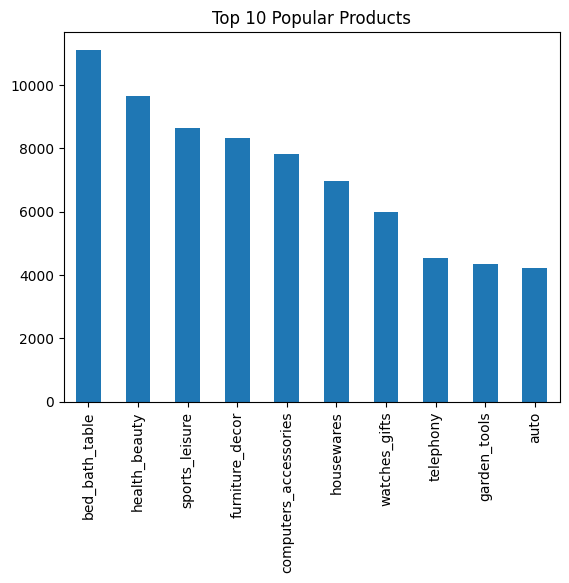

In [90]:
#create bar chart to visualize top 10 values
top_10.plot(kind='bar', title = 'Top 10 Popular Products')

Bed bath table is the most popular product category

In [92]:
bottom_10 = (popular_df['product_category_name_english'].value_counts()).iloc[-10:]
print(bottom_10)

music                                38
furniture_mattress_and_upholstery    38
flowers                              33
fashion_sport                        30
home_comfort_2                       30
arts_and_craftmanship                24
la_cuisine                           14
cds_dvds_musicals                    14
fashion_childrens_clothes             8
security_and_services                 2
Name: product_category_name_english, dtype: int64


<Axes: title={'center': 'Ten Least Popular Categories'}>

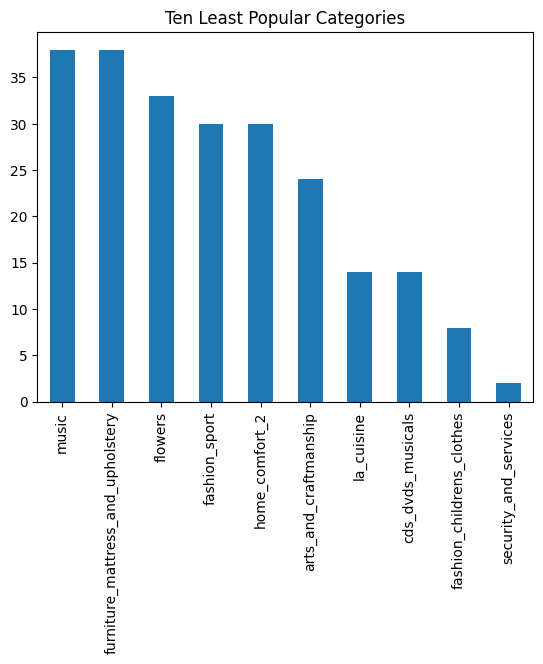

In [94]:
bottom_10.plot(kind='bar', title = 'Ten Least Popular Categories')

In [95]:
#top_10 products by sales
top_10_sales = pd.pivot_table(
   popular_df,
   index=['product_category_name_english'],
   aggfunc={'price': np.sum,}
).sort_values(['price'],  ascending=[False]).iloc[:10]
print(top_10_sales)

                                    price
product_category_name_english            
health_beauty                  1258681.34
watches_gifts                  1205005.68
bed_bath_table                 1036988.68
sports_leisure                  988048.97
computers_accessories           911954.32
furniture_decor                 729762.49
cool_stuff                      635290.85
housewares                      632248.66
auto                            592720.11
garden_tools                    485256.46


<Axes: title={'center': 'Most popular Products by Sales'}, xlabel='product_category_name_english'>

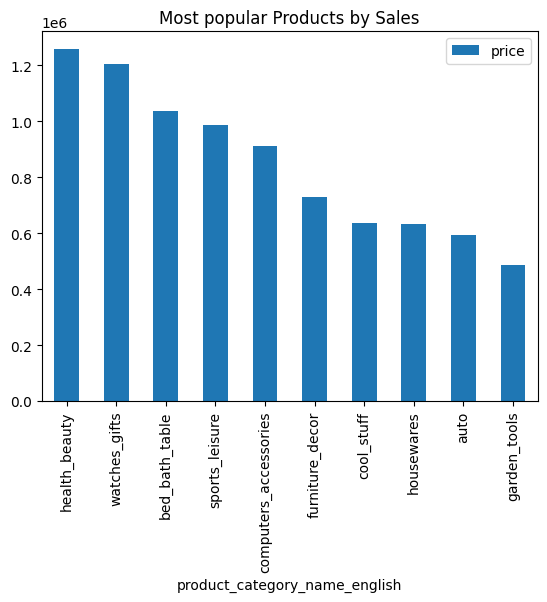

In [96]:
#create bar chart to visualize top 10 values
top_10_sales.plot(kind='bar', title= 'Most popular Products by Sales')

In [97]:
#bottom_10 popular products by Sales
bottom_10_sales = pd.pivot_table(
   popular_df,
   index=['product_category_name_english'],
   aggfunc={'price': np.sum,}
).sort_values(['price'],  ascending=[False]).iloc[-10:]
print(bottom_10_sales)
     

                                 price
product_category_name_english         
fashio_female_clothing         2803.64
fashion_sport                  2119.51
la_cuisine                     2054.99
arts_and_craftmanship          1814.01
diapers_and_hygiene            1567.59
flowers                        1110.04
home_comfort_2                  760.27
cds_dvds_musicals               730.00
fashion_childrens_clothes       569.85
security_and_services           283.29


<Axes: title={'center': ' Least popular Products by Sales'}, xlabel='product_category_name_english'>

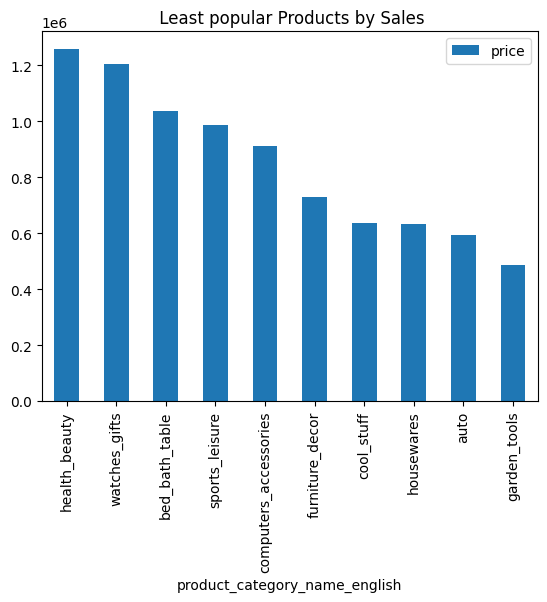

In [98]:
#create bar chart to visualize top 10 values
top_10_sales.plot(kind='bar', title= ' Least popular Products by Sales')

While bed_bath_table are the most sold in terms of sheer numbers, they are not the ones selling most in terms of sales. However, most of the items in top 10 for both sales and number remain generally the same

**What is the average order value (AOV) on Olist, and how does this vary by product category or payment method?**

In [99]:
#Average_Order_Value
Average_Order_Value = popular_df["price"].mean()
print(Average_Order_Value)

120.75510425767634


The average order value for an order on Olist is $120.74

In [101]:
#to valculate the average sales per category
mean_by_category = popular_df.groupby(['product_category_name_english'])['price'].mean()
print(mean_by_category)

product_category_name_english
agro_industry_and_commerce    342.124858
air_conditioning              185.269226
art                           115.802105
arts_and_craftmanship          75.583750
audio                         139.254121
                                 ...    
stationery                     91.753369
tablets_printing_image         90.703735
telephony                      71.213978
toys                          117.548360
watches_gifts                 201.135984
Name: price, Length: 71, dtype: float64


In [102]:
#top_10_average_sales_wrt_category
top_10_aov_sales = pd.pivot_table(
   popular_df,
   index=['product_category_name_english'],
   aggfunc={'price': np.mean,}
).sort_values(['price'],  ascending=[False]).iloc[:10]
print(top_10_aov_sales)

                                             price
product_category_name_english                     
computers                              1098.340542
small_appliances_home_oven_and_coffee   624.285658
home_appliances_2                       476.124958
agro_industry_and_commerce              342.124858
musical_instruments                     281.616000
small_appliances                        280.778468
fixed_telephony                         225.693182
construction_tools_safety               208.992371
watches_gifts                           201.135984
air_conditioning                        185.269226


<Axes: title={'center': 'Product Categories with the Highest Average Sales'}, xlabel='product_category_name_english'>

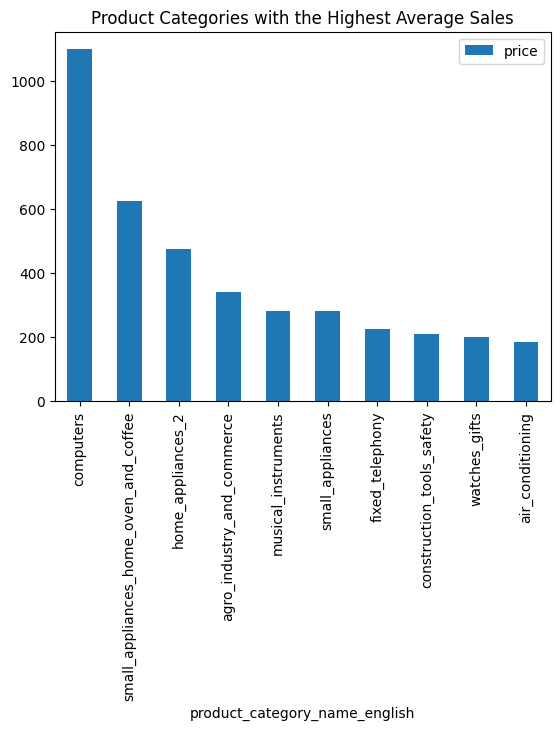

In [103]:
#create bar chart to visualize top 10 values
top_10_aov_sales.plot(kind='bar', title='Product Categories with the Highest Average Sales')

In [106]:
#bottom_aov per wrt product category
bottom_10_aov_sales = pd.pivot_table(
   popular_df,
   index=['product_category_name_english'],
   aggfunc={'price': np.mean,}
).sort_values(['price'],  ascending=[False]).iloc[-10:]
print(bottom_10_aov_sales)


                                   price
product_category_name_english           
drinks                         59.178628
fashio_female_clothing         58.409167
electronics                    57.913531
food                           57.634137
christmas_supplies             57.521699
food_drink                     54.602446
cds_dvds_musicals              52.142857
diapers_and_hygiene            40.194615
flowers                        33.637576
home_comfort_2                 25.342333


<Axes: title={'center': 'Product Categories with the Lowest Average Sales'}, xlabel='product_category_name_english'>

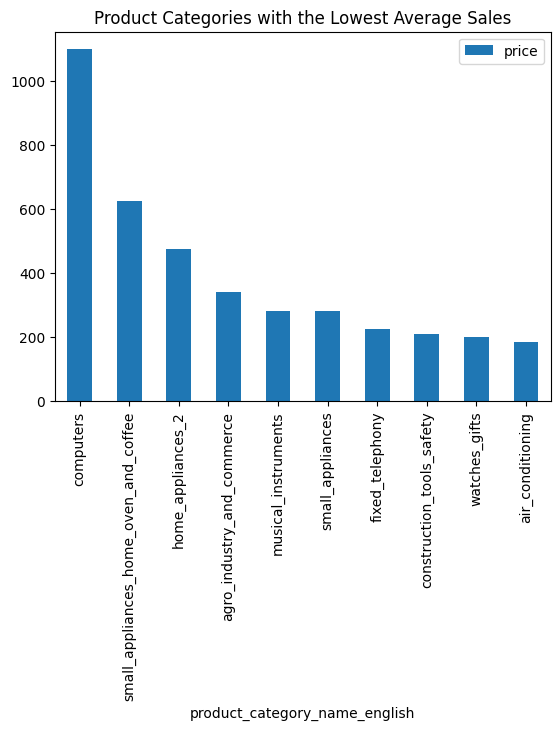

In [107]:
#create bar chart to visualize bottom 10 values
top_10_aov_sales.plot(kind='bar', title='Product Categories with the Lowest Average Sales')

Expensive things do not have the highest volumes

In [108]:

#lets drop a few columns from popular_df

new_df = popular_df.drop(['product_name_length',	'product_description_length',	'product_photos_qty',	'product_weight_g',	'product_length_cm',	'product_height_cm', 'product_width_cm'	], axis=1)
new_df.head(5)
     

,product_id,product_category_name,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,048cc42e03ca8d43c729adf6962cb348,1,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78,perfumery
2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,5fa78e91b5cb84b6a8ccc42733f95742,1,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78,perfumery
3,0d009643171aee696f4733340bc2fdd0,perfumaria,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,1,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13,perfumery
4,0d009643171aee696f4733340bc2fdd0,perfumaria,7b13c77c64a9a956500cbf1a9a23798d,1,7178f9f4dd81dcef02f62acdf8151e01,2018-05-30 10:38:35,275.00,23.48,perfumery


In [109]:
new_df = new_df.drop(['seller_id',	'order_item_id',	'shipping_limit_date',	'freight_value'], axis=1)
new_df.head(5)

,product_id,product_category_name,order_id,price,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,10.91,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,048cc42e03ca8d43c729adf6962cb348,16.90,perfumery
2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,5fa78e91b5cb84b6a8ccc42733f95742,16.90,perfumery
3,0d009643171aee696f4733340bc2fdd0,perfumaria,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,339.00,perfumery
4,0d009643171aee696f4733340bc2fdd0,perfumaria,7b13c77c64a9a956500cbf1a9a23798d,275.00,perfumery


In [110]:
#lets merge the new_df with payment_df
newest_df = pd.merge(payments_df,new_df,on='order_id')
newest_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,product_id,product_category_name,price,product_category_name_english
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,af74cc53dcffc8384b29e7abfa41902b,casa_construcao,79.80,home_construction
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,a630cc320a8c872f9de830cf121661a3,automotivo,17.00,auto
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,2028bf1b01cafb2d2b1901fca4083222,perfumaria,56.99,perfumery
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,548e5bfe28edceab6b51fa707cc9556f,cama_mesa_banho,89.90,bed_bath_table
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,386486367c1f9d4f587a8864ccb6902b,cama_mesa_banho,113.57,bed_bath_table


In [111]:
top_10_payment_type_average_sales = pd.pivot_table(
   newest_df,
   index=['payment_type'],
   aggfunc={'price': np.mean,}
).sort_values(['price'],  ascending=[False]).iloc[:10]
print(top_10_payment_type_average_sales)

                   price
payment_type            
credit_card   126.633035
debit_card    108.906526
voucher       104.905878
boleto        104.525530


Credit card was the highest when it comes to average sales

In [112]:
#top_10_payment_type_average_sales_per_category
top_10_payment_type_average_sales_per_category = pd.pivot_table(
   newest_df,
   index=['payment_type', 'product_category_name_english'],
   aggfunc={'price': np.mean,}
).sort_values(['price'],  ascending=[False]).iloc[:10]
print(top_10_payment_type_average_sales_per_category)

                                                          price
payment_type product_category_name_english                     
voucher      computers                              1180.956667
credit_card  computers                              1116.238391
boleto       computers                              1012.195588
voucher      small_appliances_home_oven_and_coffee   750.000000
credit_card  small_appliances_home_oven_and_coffee   648.429231
             home_appliances_2                       557.288703
boleto       small_appliances_home_oven_and_coffee   502.232222
debit_card   fixed_telephony                         421.076667
credit_card  agro_industry_and_commerce              350.122690
voucher      musical_instruments                     346.203400


The average sales brought in by computers for the customers who paid by voucher were the highest

In [113]:
#bottom_10_payment_type_average_sales_per_category
bottom_10_payment_type_average_sales_per_category = pd.pivot_table(
   newest_df,
   index=['payment_type', 'product_category_name_english'],
   aggfunc={'price': np.mean,}
).sort_values(['price'],  ascending=[False]).iloc[-10:]
print(bottom_10_payment_type_average_sales_per_category)

                                                        price
payment_type product_category_name_english                   
debit_card   construction_tools_safety              33.900000
credit_card  flowers                                33.295000
voucher      books_technical                        29.616667
boleto       dvds_blu_ray                           28.985333
debit_card   small_appliances_home_oven_and_coffee  27.720000
boleto       la_cuisine                             24.000000
credit_card  home_comfort_2                         19.164783
voucher      cine_photo                             13.900000
             christmas_supplies                     13.010000
             home_comfort_2                         12.900000


The average Sales from home_comfort_2 by voucher were the lowest

**How many sellers are active on Olist, and how does this number change over time**

In [114]:
sellers_df.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Sao Paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista,SP


In [116]:
#to find total number of sellers on Olist
total_sellers = sellers_df['seller_id'].nunique()
print(total_sellers)

3095



There were 3095 sellers found on Olist

In [117]:
#merge with geolocation table to see how sellers are distributed in the states
geolocation_df.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Sao Paulo,SP
1,1046,-23.546081,-46.644820,Sao Paulo,SP


In [ ]:
#rename the state column

In [119]:
seller2_df = pd.merge(geolocation_df,sellers_df,on='geolocation_state')
seller2_df.head(5)

KeyError: ignored